Nama : Afifah Nibras

NPM : 2108107010097

Link Dataset : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

Dataset tersebut memiliki 9 kolom yaitu 
Serial No.,	GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR, CGPA,	Research, dan	Chance of Admit. Saya melakukan studi kasus melihat hubungan antara CGPA dengan chance of admit. Dengan menjadikan CGPA sebagai fitur dan Chance of Admit sebagai target. Kemudian saya membuat model SVR untuk masing-maisng kernel dan menampilkan visualisasi model untuk masing-masing kernel tersebut. Saya juga menampilkan nilai dari MSE, RMSE, MAE, dan R-Squared.

In [154]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# Mengambil dataset
dataset = pd.read_csv('adm_data.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


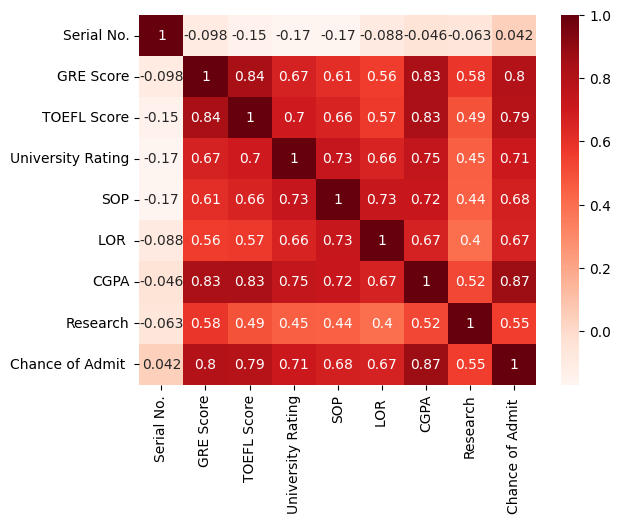

In [158]:
# Menampilkan korelasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.show()

In [168]:
# Memisahkan fitur dan target
X = dataset['CGPA'].values.reshape(-1, 1)
y = dataset['Chance of Admit '].values

# Pembagian data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Penskalaan fitur
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Melakukan prediksi terhadap seluruh data
y_pred = regressor.predict(X_scaled)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Menghitung koefisien determinasi (R-squared)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)


Mean Squared Error (MSE): 0.005441275578578038
Mean Absolute Error (MAE): 0.05968983053749131
R-squared: 0.7317795188183893
RMSE: 0.07376500239665175


In [172]:
# Membuat model masing-masing kernel
# 1. Linear Kernel
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X_train_scaled, y_train)

# 2. Polynomial Kernel
regressor_poly = SVR(kernel='poly', degree=3)  # Adjust 'degree' for polynomial order
regressor_poly.fit(X_train_scaled, y_train)

# 3. Radial Basis Function (RBF) Kernel
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train_scaled, y_train)

SVR()

In [176]:
# Memprediksi maisng-masing kernel
y_pred_linear = regressor_rbf.predict(X_test_scaled)
y_pred_poly = regressor_poly.predict(X_test_scaled)
y_pred_rbf = regressor_rbf.predict(X_test_scaled)

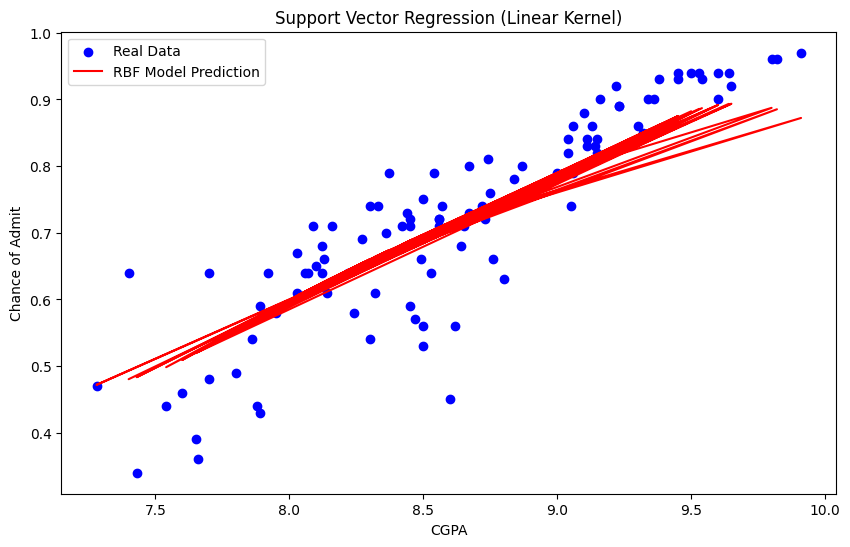

In [179]:
# Visualisasi linear kernel
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Real Data')
plt.plot(X_test, y_pred_linear, color='red', label='RBF Model Prediction')
plt.title('Support Vector Regression (Linear Kernel)')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

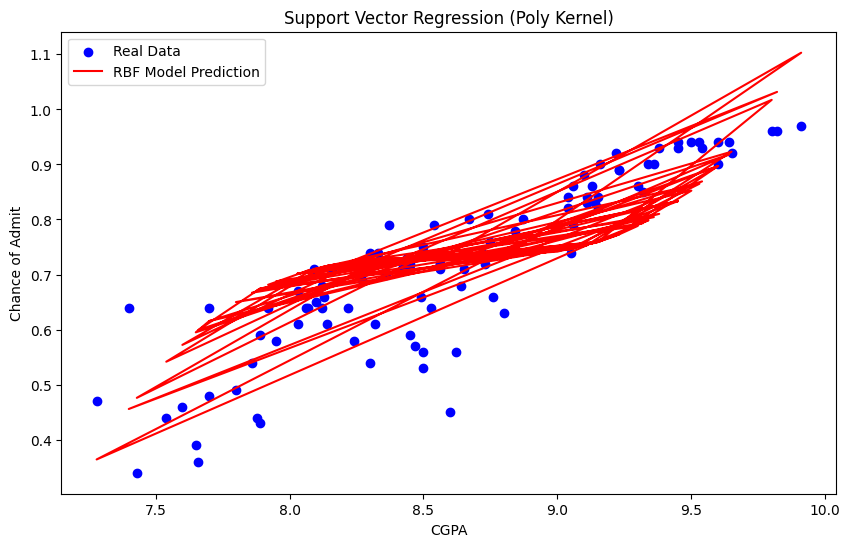

In [180]:
# Visualisasi Polynomial Kernel
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Real Data')
plt.plot(X_test, y_pred_poly, color='red', label='RBF Model Prediction')
plt.title('Support Vector Regression (Poly Kernel)')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

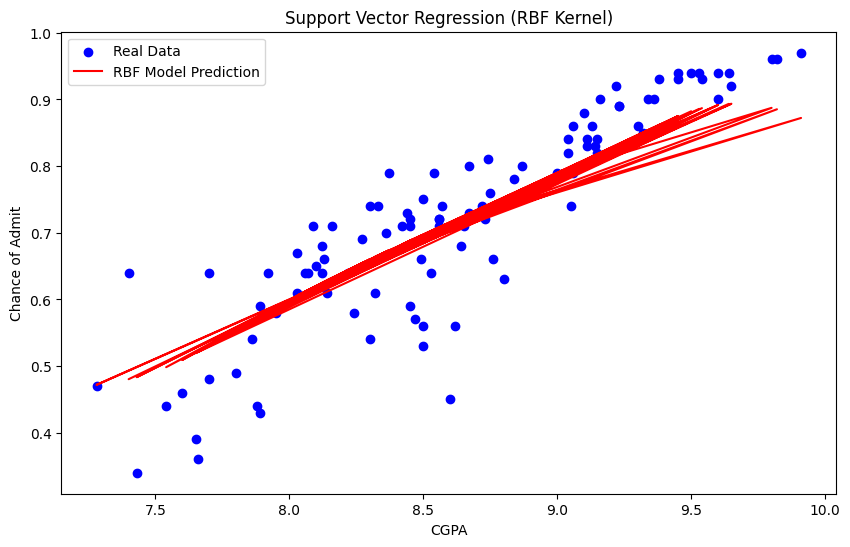

In [175]:
# Visualization RBF Kernel
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Real Data')
plt.plot(X_test, y_pred_rbf, color='red', label='RBF Model Prediction')
plt.title('Support Vector Regression (RBF Kernel)')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()